<a href="https://colab.research.google.com/github/berkezkul/HousingPricePrediction--Mining_and_Machine-Learning/blob/main/HousingPricePrediction_Istanbul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor   #çok değişkenli aykırı değer yakalama
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [ ]:
def load():
    data = pd.read_csv("/content/sample_data/dataset.csv")
    return data

In [156]:
df = load()

In [ ]:
df.head(20)

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,room_and_hall_number,gross_and_net_m2,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,in_this_site,period,room_number,double_beds_number,single_bed_number,halls_number,guests_number,gross_m2,net_m2,invoices_included_in_the_price,cleaning_fee,video_calling,pets_allowed,entertainment_arranged
0,"""2799900",137998-55,14.05.2024,Satılık,Daire,Daire,2 + 1,125 m2\n/ 105 m2,2. Kat,3 Yaşında,Kombi,4 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250 TL,Evet,"Güney, Doğu",20.000 TL,Doğalgaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""1624000",132292-719,14.05.2024,Satılık,Daire,Daire,2 + 1,98 m2\n/ 91 m2,4. Kat,10 Yaşında,Kombi,20 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,Evet (Site Adı Belirtilmemiş),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""10000000",4369-39466,2.05.2024,Satılık,Daire,NaN,3 + 1,175 m2\n/ 160 m2,1. Kat,11 Yaşında,Kombi,8 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,NaN,NaN,NaN,Beş Yıldız Serena Evleri,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""11000000",4369-39353,2.05.2024,Satılık,Daire,NaN,3 + 1,168 m2\n/ 152 m2,1. Kat,16 Yaşında,Kombi,9 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,3.35 TL,Hayır,"Güney, Batı",NaN,NaN,NaN,NaN,Ağaoğlu My Town Sitesi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""3885000",135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,4 + 2,280 m2\n/ 250 m2,Ara Kat,Sıfır Bina,Kombi,5 Katlı,Uygun,Eşyalı Değil,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"""2460000",135879-14,14.05.2024,Satılık,Daire,NaN,2 + 1,140 m2\n/ 120 m2,2. Kat,Sıfır Bina,Kombi,4 Katlı,Uygun,Eşyalı Değil,2.000,NaN,NaN,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"""1699000",132267-324,14.05.2024,Satılık,Daire,Daire,2 + 1,120 m2\n/ 108 m2,2. Kat,Sıfır Bina,Kombi,4 Katlı,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,Güney,NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"""110000",98015-1975,14.05.2024,Kiralık,Residence,Daire,3 + 1,250 m2\n/ 200 m2,17. Kat,15 Yaşında,Merkezi (Pay Ölçer),50 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"""150000",98015-1979,14.05.2024,Kiralık,Residence,Daire,4 + 1,302 m2\n/ 225 m2,20. Kat,20 Yaşında,Merkezi (Pay Ölçer),27 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,NaN,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"""140000",98015-2005,14.05.2024,Kiralık,Residence,Daire,3 + 1,286 m2\n/ 180 m2,5. Kat,15 Yaşında,Kombi,35 Katlı,NaN,Eşyalı Değil,3.000,Betonarme,İkinci El,Boş,NaN,NaN,NaN,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,Selenium Twins Residence,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
def get_column_info(df, columns_of_interest):
    """
     Her değişken içindeki kaç sınıf olduğunu ve sınıfların kaçar tane veri barındırdığını görmek için kullanacağız.

    """
    column_info = {}
    for col in columns_of_interest:
        nunique = df[col].nunique()
        value_counts = df[col].value_counts()
        column_info[col] = {
            "unique_value_count": nunique,
            "value_counts": value_counts.to_dict()
        }
    return column_info

In [ ]:
get_column_info(df, ['which_that_floor', 'building_age', 'floor_number'])

{'which_that_floor': {'unique_value_count': 36,
  'value_counts': {'2. Kat': 535,
   '1. Kat': 432,
   '3. Kat': 428,
   '4. Kat': 403,
   'Bahçe Katı': 277,
   'Ara Kat': 266,
   'Yüksek Giriş': 249,
   '5. Kat': 242,
   'En Üst Kat': 132,
   '6. Kat': 130,
   'Giriş Katı': 125,
   '7. Kat': 97,
   '8. Kat': 93,
   '9. Kat': 59,
   '21 ve üzeri': 59,
   'Çatı Katı': 58,
   '10. Kat': 50,
   '11. Kat': 41,
   'Kot 1': 41,
   '12. Kat': 27,
   'Yarı Bodrum': 20,
   '14. Kat': 20,
   'Zemin': 19,
   '15. Kat': 18,
   'Kot 2': 16,
   '13. Kat': 15,
   '16. Kat': 14,
   'Teras Katı': 12,
   '20. Kat': 12,
   'Bodrum ve Zemin': 11,
   '17. Kat': 8,
   'Kot 3': 8,
   'Bodrum': 7,
   '19. Kat': 6,
   'Villa Katı': 6,
   '18. Kat': 5}},
 'building_age': {'unique_value_count': 69,
  'value_counts': {'Sıfır Bina': 770,
   '5 Yaşında': 323,
   '30 Yaşında': 243,
   '4 Yaşında': 204,
   '25 Yaşında': 166,
   '10 Yaşında': 165,
   '35 Yaşında': 161,
   '40 Yaşında': 133,
   '15 Yaşında': 130,
   '1

Verimizdeki bina yaşı (3 Yaşında), kat sayısı (4 Katlı) gibi aslında sayısal olan ama text olarak yazılan değişkenleri veya içerisinde 2 bilgi barındıran net brüt m2 (120/110 m2), oda salon sayısı (2+1) gibi değişkenleri dönüştürme işlemlerini yapacağız.

In [158]:
def pre_cleaning(df):

  df['price'] = df['price'].str.replace('"', '').astype(int)
  df['dues'] = df['dues'].str.replace(' TL', '').str.replace('.', '').astype(float)
  df['deposit'] = df['deposit'].str.replace(' TL', '').str.replace('.', '').astype(float)
  df['rental_income'] = df['rental_income'].str.replace(' TL', '').str.replace('.', '').astype(float)


  df['floor_number'] = df['floor_number'].str.replace(' Katlı', '').str.replace('.', '').astype(float)

  df['gross_m2'] = df['gross_and_net_m2'].str.extract(r'(\d+)\s*m2').astype(float)
  df['net_m2'] = df['gross_and_net_m2'].str.extract(r'/\s*(\d+)\s*m2').astype(float)

  df[['room_num', 'hall_num']] = df['room_and_hall_number'].str.split('+', expand=True)
  df['room_num'] = df['room_num'].astype(float)
  df['hall_num'] = df['hall_num'].astype(float)

  #3 Yaşında yerine veya Sıfır Bina yerine integer olarak ele aldık.
  df['building_age'] = df['building_age'].str.replace(' Yaşında', '')
  df['building_age'] = df['building_age'].replace('Sıfır Bina', '0')
  df['building_age' ] = df['building_age'].astype(int)

  #2.Kat vs yerine integer kısmı aldık.
  df['which_that_floor'] = df['which_that_floor'].str.replace('. Kat', '')
  df['which_that_floor'] = df.apply(lambda row: 0 if row['which_that_floor'] in ['Giriş', 'Giriş Kat', 'Yüksek Giriş', 'Bodrum', 'Yarı Bodrum', 'Zemin', 'Bahçe Katı' 'Kot 1', 'Kot 2', 'Kot 3'] else row['which_that_floor'], axis=1)
  df['which_that_floor'] = df.apply(lambda row: int(row['floor_number']) if row['which_that_floor'] in ['En Üst Kat', 'Çatı Katı', 'Teras Katı', 'Villa Katı'] else row['which_that_floor'], axis=1)
  df['which_that_floor'] = df.apply(lambda row: int(float(row['floor_number']) / 2) if row['which_that_floor'] == 'Ara Kat' else row['which_that_floor'], axis=1)

  df['which_that_floor'].fillna(int(df['floor_number'].mean()), inplace=True)
  mean_floor = int(df['floor_number'].mean(skipna=True))
  df['which_that_floor'] = df['which_that_floor'].apply(
      lambda x: mean_floor if not str(x).isdigit() else x
  )
  df['which_that_floor'] = df['which_that_floor'].astype(int)

  # Site içerisinde olup olmadığını belirleyen yeni bir sütun oluşturduk ve site isimlerini yeni sütuna yazdık.
  df['in_site'] = df['in_this_site'].notna().astype(int)
  df['site_name'] = df['in_this_site'].where(df['in_this_site'].notna(), 'No Site')

  #drop etme
  df.drop(columns=['room_and_hall_number', 'gross_and_net_m2', 'in_this_site'], inplace=True)

  return df

Günlük kiralık olanları ayrı bir dataframe'e kiralık olanları da başka bir dataframe'e atadık.

In [159]:
def seperate_houses(df):
  #Günlük kiralık olanların df (daily_rental_df)
  daily_rental_df = df[df['advert_state'].isnull()]

  # Kiralık olanların df (rental_df)
  rental_df = df[df['advert_state'] == 'Kiralık']

  # Orijinal dataframe'den günlük kiralık olanları ve kiralık olanları çıkardık. Sadece satılıklar kaldı.
  df = df[~df['advert_state'].isnull() & (df['advert_state'] != 'Kiralık')]

  #Her birini ayrı csv lere kaydettik.
  daily_rental_df.to_csv('daily_rental_data.csv', index=False)
  rental_df.to_csv('rental_data.csv', index=False)
  df.to_csv('updated_main_data.csv', index=False)

  return daily_rental_df, rental_df, df

In [160]:
daily_rental_df, rental_df, df = seperate_houses(df)

In [ ]:
df.head()

,price,advert_id,last_update_date,advert_state,house_type,housing_shape,which_that_floor,building_age,heating_type,floor_number,credit_elegibility,furniture_status,bath_number,structure_type,structure_status,using_status,title_deed_status,dues,swap,facade,rental_income,fuel_type,authorized_office,deposit,period,room_number,double_beds_number,single_bed_number,halls_number,guests_number,gross_m2,net_m2,invoices_included_in_the_price,cleaning_fee,video_calling,pets_allowed,entertainment_arranged,room_num,hall_num,in_site,site_name
0,2799900,137998-55,14.05.2024,Satılık,Daire,Daire,2,3,Kombi,4.000,Uygun,Eşyalı Değil,1.000,Betonarme,İkinci El,Boş,Kat Mülkiyeti,250.000,Evet,"Güney, Doğu",20000.000,Doğalgaz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.000,105.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,0,No Site
1,1624000,132292-719,14.05.2024,Satılık,Daire,Daire,4,10,Kombi,20.000,Uygun,Eşyalı Değil,1.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.000,91.000,NaN,NaN,NaN,NaN,NaN,2.000,1.000,1,Evet (Site Adı Belirtilmemiş)
2,10000000,4369-39466,2.05.2024,Satılık,Daire,NaN,1,11,Kombi,8.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,NaN,Hayır,"Güney, Doğu",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175.000,160.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Beş Yıldız Serena Evleri
3,11000000,4369-39353,2.05.2024,Satılık,Daire,NaN,1,16,Kombi,9.000,Uygun,Eşyalı Değil,2.000,NaN,NaN,Kiracılı,Kat Mülkiyeti,335.000,Hayır,"Güney, Batı",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.000,152.000,NaN,NaN,NaN,NaN,NaN,3.000,1.000,1,Ağaoğlu My Town Sitesi
4,3885000,135879-54,14.05.2024,Satılık,Daire,Ara Kat Dubleks,2,0,Kombi,5.000,Uygun,Eşyalı Değil,3.000,Betonarme,Sıfır,Boş,Kat Mülkiyeti,NaN,Evet,"Kuzey, Güney, Doğu, Batı",NaN,Doğalgaz,Evet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280.000,250.000,NaN,NaN,NaN,NaN,NaN,4.000,2.000,0,No Site


**MISSING VALUES**

---



In [161]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns

In [162]:
missing_values_table(df, True)

                                n_miss   ratio
deposit                           2890 100.000
period                            2890 100.000
pets_allowed                      2890 100.000
video_calling                     2890 100.000
single_bed_number                 2890 100.000
double_beds_number                2890 100.000
room_number                       2890 100.000
entertainment_arranged            2890 100.000
invoices_included_in_the_price    2884  99.790
halls_number                      2882  99.720
cleaning_fee                      2882  99.720
net_m2                            2882  99.720
gross_m2                          2882  99.720
guests_number                     2882  99.720
in_this_site                      2320  80.280
rental_income                     1758  60.830
dues                              1702  58.890
authorized_office                  995  34.430
structure_type                     769  26.610
structure_status                   702  24.290
fuel_type    

['housing_shape',
 'which_that_floor',
 'credit_elegibility',
 'furniture_status',
 'bath_number',
 'structure_type',
 'structure_status',
 'using_status',
 'title_deed_status',
 'dues',
 'swap',
 'facade',
 'rental_income',
 'fuel_type',
 'authorized_office',
 'deposit',
 'in_this_site',
 'period',
 'room_number',
 'double_beds_number',
 'single_bed_number',
 'halls_number',
 'guests_number',
 'gross_m2',
 'net_m2',
 'invoices_included_in_the_price',
 'cleaning_fee',
 'video_calling',
 'pets_allowed',
 'entertainment_arranged']

Eksik değerleri doldurmadan önce değişkenlerimizin neler olduğunu, nasıl yaklaşmamız gerektiğini inceledik.

Kategorik, numerik, kategorik gözüken ama numerik olan değişkenlerin tespitini yaptık.

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Notes
    ------

        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        (Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.)
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2890
Variables: 29
cat_cols: 16
num_cols: 10
cat_but_car: 3
num_but_cat: 2


In [ ]:
cat_cols

['advert_state',
 'house_type',
 'housing_shape',
 'heating_type',
 'credit_elegibility',
 'furniture_status',
 'structure_type',
 'structure_status',
 'using_status',
 'title_deed_status',
 'swap',
 'facade',
 'fuel_type',
 'authorized_office',
 'hall_num',
 'in_site']

In [ ]:
num_cols

['price',
 'which_that_floor',
 'building_age',
 'floor_number',
 'bath_number',
 'dues',
 'rental_income',
 'gross_m2',
 'net_m2',
 'room_num']

In [ ]:
cat_but_car

['advert_id', 'last_update_date', 'site_name']

room_num değişkeni numerikler içinde gözükürken hall_num kategorikler içinde gözüküyor. Bunun sebebi hall_num ın çok az sınıfa sahip olmasıdır. Bir ev genelde 1 veya 2 salona sahip oluyor. hall_num ve room_num ı kategorik hale getirebiliriz. Ve burda da görüldüğü üzere bazı sınıflar oldukça düşük frekansa sahipler. Burda bazı sınıfları bir araya getirerek yeni kategoriler ortaya çıkartabiliriz.

In [ ]:
get_column_info(df, ['hall_num', 'room_num'])

{'hall_num': {'unique_value_count': 9,
  'value_counts': {1.0: 2576,
   2.0: 258,
   0.0: 23,
   3.0: 19,
   4.0: 8,
   5.0: 3,
   115.0: 1,
   6.0: 1,
   9.0: 1}},
 'room_num': {'unique_value_count': 17,
  'value_counts': {2.0: 1134,
   3.0: 1014,
   4.0: 271,
   1.0: 244,
   5.0: 100,
   6.0: 64,
   7.0: 25,
   8.0: 13,
   9.0: 8,
   10.0: 4,
   11.0: 3,
   13.0: 3,
   12.0: 3,
   16.0: 1,
   20.0: 1,
   140.0: 1,
   30.0: 1}}}

Düşük Frekanslı Değerlere Yaklaşım

In [ ]:
get_column_info(df, cat_cols)

{'advert_state': {'unique_value_count': 1, 'value_counts': {'Satılık': 2890}},
 'house_type': {'unique_value_count': 12,
  'value_counts': {'Daire': 2552,
   'Villa': 152,
   'Residence': 100,
   'Müstakil Ev': 42,
   'Bina': 22,
   'Yalı': 8,
   'Yazlık': 6,
   'Çiftlik Evi': 3,
   'Köşk': 2,
   'Bungalov': 1,
   'Prefabrik': 1,
   'Yalı Dairesi': 1}},
 'housing_shape': {'unique_value_count': 12,
  'value_counts': {'Daire': 1787,
   'Çatı Dubleksi': 126,
   'Dubleks': 101,
   'Bahçe Katı': 99,
   'Müstakil Ev': 70,
   'Tripleks': 53,
   'Bahçe Dubleksi': 30,
   'Ara Kat Dubleks': 21,
   'Fourlex': 15,
   'Ters Dubleks': 11,
   'İkiz Ev': 2,
   '1': 1}},
 'heating_type': {'unique_value_count': 13,
  'value_counts': {'Kombi': 2092,
   'Merkezi (Pay Ölçer)': 440,
   'Merkezi': 207,
   'Yerden Isıtma': 74,
   'Kat Kaloriferi': 23,
   'Soba': 13,
   'Klima': 10,
   'Isıtma Yok': 8,
   'Doğalgaz Sobası': 8,
   'VRV': 5,
   'Fancoil Ünitesi': 5,
   'Belirtilmemiş': 3,
   'Güneş Enerjisi': 2}

In [ ]:
def simplify_low_frequency_classes(df):

    def simplify_housing_shape(shape):
        if shape in ['Daire', 'Bahçe Katı']:
            return 'Apartment'
        elif shape in ['Müstakil Ev', 'İkiz Ev']:
            return 'Detached House'
        elif shape in ['Çatı Dubleksi', 'Dubleks', 'Ters Dubleks', 'Bahçe Dubleksi', 'Ara Kat Dubleks']:
            return 'Duplex'
        else:
            return 'Other'

    df.loc[:, 'housing_shape'] = df['housing_shape'].apply(simplify_housing_shape)

    def simplify_heating_type(heating):
        if heating in ['Merkezi (Pay Ölçer)', 'Merkezi']:
            return 'Central Heating'
        elif heating in ['Kombi']:
            return 'Kombi'
        elif heating in ['Yerden Isıtma']:
            return 'Floor/Fireplace Heating'
        elif heating in ['Soba', 'Doğalgaz Sobası']:
            return 'Soba'
        else:
            return 'Other'

    df.loc[:, 'heating_type'] = df['heating_type'].apply(simplify_heating_type)

    # other low-frequency class handling
    def simplify_class(column, frequent_classes):
        df.loc[:, column] = df[column].apply(lambda x: x if pd.isnull(x) or x in frequent_classes else 'Other')

    # house_type
    df.loc[:, 'house_type'] = df['house_type'].apply(lambda x: x if x in ['Daire', 'Villa', 'Residence', 'Müstakil Ev'] else 'Other')

    # structure_type
    frequent_structure_types = ['Betonarme']
    simplify_class('structure_type', frequent_structure_types)

    # fuel_type
    frequent_fuel_types = ['Doğalgaz', 'Elektrik']
    simplify_class('fuel_type', frequent_fuel_types)

    # hall_num
    df.loc[:, 'hall_num'] = df['hall_num'].apply(lambda x: x if x in [0.0, 1.0, 2.0] else '3+')

    # room_num
    df.loc[:, 'room_num'] = df['room_num'].apply(lambda x: x if x in [1.0, 2.0, 3.0, 4.0, 5.0] else '6+')

    return df

In [ ]:
get_column_info(df, cat_cols)

{'advert_state': {'unique_value_count': 1, 'value_counts': {'Satılık': 2890}},
 'house_type': {'unique_value_count': 5,
  'value_counts': {'Daire': 2552,
   'Villa': 152,
   'Residence': 100,
   'Other': 44,
   'Müstakil Ev': 42}},
 'housing_shape': {'unique_value_count': 4,
  'value_counts': {'Apartment': 1886,
   'Other': 643,
   'Duplex': 289,
   'Detached House': 72}},
 'heating_type': {'unique_value_count': 5,
  'value_counts': {'Kombi': 2092,
   'Central Heating': 647,
   'Floor/Fireplace Heating': 74,
   'Other': 56,
   'Soba': 21}},
 'credit_elegibility': {'unique_value_count': 3,
  'value_counts': {'Uygun': 2599, 'Uygun değil': 208, 'Bilinmiyor': 24}},
 'furniture_status': {'unique_value_count': 2,
  'value_counts': {'Eşyalı Değil': 2594, 'Eşyalı': 131}},
 'structure_type': {'unique_value_count': 2,
  'value_counts': {'Betonarme': 2066, 'Other': 55}},
 'structure_status': {'unique_value_count': 4,
  'value_counts': {'İkinci El': 1502,
   'Sıfır': 660,
   'Yapım Aşamasında': 20

**OUTLIERS**

---


Aykırı değerleri tespit edip baskılayacağız.

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

**TRANSFORMING**

---



In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe.loc[:, binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [148]:
def pre_processing(df):

  cat_cols, num_cols, cat_but_car = grab_col_names(df)


  # %95'dan fazla eksik değeri olan sütunları kaldırdık.
  threshold = 0.95
  df = df[df.columns[df.isnull().mean() < threshold]]

  '''MISSING VALUES'''

  cat_cols, num_cols, cat_but_car = grab_col_names(df)

  # Kategorik değişkenleri mod ile, sayısal değişkenleri median ile doldurduk.
  for col in cat_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

  for col in num_cols:
    df.loc[:, col] = df[col].fillna(df[col].median())


  '''OUTLIERS'''
  for col in num_cols:
    replace_with_thresholds(df, col)


  '''TRANSFORMING'''

  # label encoding
  binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]
  for col in binary_cols:
    df = label_encoder(df, col)

  #one hot encoding
  ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2 and col not in num_cols]
  df = one_hot_encoder(df, ohe_cols, drop_first=True)

  #multi label değişken olan facade'de one hot encoding:

  facade_dummies = df['facade'].str.get_dummies(sep=', ')
  facade_dummies.columns = ['facade_' + col.lower() for col in facade_dummies.columns]
  df = pd.concat([df, facade_dummies], axis=1)
  df.drop(columns=['facade'], inplace=True)
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

  # hepsi satılık olduğu için advert_state i, tek bir değer barındırdığı için authorized_office i ve kategorik olsa da çok fazla sınıf
  # bulunduğu için anlam ifade etmeyen(cat_but_car = ['advert_id', ''last_update_date', 'site_name']) değişkenleri çıkarttık.
  df.drop(columns=['advert_state', 'authorized_office'], inplace=True)
  df.drop(columns=cat_but_car, inplace=True)

  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  num_cols = [col for col in num_cols if col != 'price']

  '''NORMALIZATION'''

  X_scaled = StandardScaler().fit_transform(df[num_cols])
  df[num_cols] = pd.DataFrame(X_scaled, columns=df[num_cols].columns)

  y = df["price"]
  X = df.drop(["price"], axis=1)


  for col in cat_cols:
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])

  for col in num_cols:
    df.loc[:, col] = df[col].fillna(df[col].median())

  '''
  # NaN kontrolü
  if X.isnull().values.any():
    print("NaN values found in X after pre-processing!")
  else:
    print("No NaN values in X after pre-processing.")
  '''
  #print(df.isnull().sum())

  return df, X, y, X_scaled

In [150]:
def evaluate_models(df, X_scaled, y, target_col='price'):
    # Model listesi
    model_list = [
        LinearRegression(),
        Ridge(),
        Lasso(),
        ElasticNet(),
        DecisionTreeRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor(),
        AdaBoostRegressor(),
        SVR(),
        KNeighborsRegressor(),
        XGBRegressor(),
        LGBMRegressor()
    ]

    model_name_list = []
    r2_score_list = []

    # Modellerin cross validation ile değerlendirilmesi
    for model in model_list:
        model_cv = cross_val_score(model, X_scaled, y, cv=10, scoring="r2", n_jobs=-1)
        model_name_list.append(model.__class__.__name__)
        r2_score_list.append(model_cv.mean())
        print(f"{model.__class__.__name__} cross validation score: {model_cv.mean()}")
        print("-" * 50)


    results_df = pd.DataFrame({'Model': model_name_list, 'R2 Score': r2_score_list})


    plt.figure(figsize=(10, 6))
    sns.barplot(x='R2 Score', y='Model', data=results_df.sort_values(by='R2 Score', ascending=False), palette='viridis')
    plt.title('Model Performance Comparison (R2 Score)')
    plt.xlabel('R2 Score')
    plt.ylabel('Model')
    plt.show()

    return results_df

In [151]:
def model_and_train(df, X_scaled,y, target_col='price'):

    param_grids = {
        'RandomForestRegressor': {
            'n_estimators': [100, 200, 300],
             'max_depth': [None, 10, 20]
         },
        'GradientBoostingRegressor': {
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 8],
            'n_estimators': [100, 200]
          },
        'AdaBoostRegressor': {
            'n_estimators': [50, 100, 200]
         },
        'XGBRegressor': {
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 8],
            'n_estimators': [100, 200]
         },
        'LGBMRegressor': {
            'learning_rate': [0.01, 0.1],
            'n_estimators': [100, 200],
            'colsample_bytree': [0.7, 1]
          }
    }

    model_list = [
        RandomForestRegressor(),
        GradientBoostingRegressor(),
        AdaBoostRegressor(),
        XGBRegressor(),
        LGBMRegressor()
    ]

    best_models = {}

    for model in model_list:
        model_name = model.__class__.__name__
        param_grid = param_grids.get(model_name, {})
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        y_pred = best_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        best_models[model_name] = best_model

        print(f"{model_name} Best Params: {best_params}")
        print(f"{model_name} R2 Score: {r2}")
        print("-" * 50)

    return best_models

**MACHINE LEARNING PIPELINE**

---



In [152]:
def main():

  df = load()

  '''DATA PREPROCESSING'''
  df = pre_cleaning(df)
  daily_rental_df, rental_df, df = seperate_houses(df)
  df = simplify_low_frequency_classes(df)
  df, X, y, X_scaled = pre_processing(df)

  '''MODEL'''
  results_df = evaluate_models(df, X_scaled, y)
  print(results_df)
  best_models = model_and_train(df, X_scaled, y)

  return df, X, y, best_models

Observations: 2890
Variables: 41
cat_cols: 29
num_cols: 9
cat_but_car: 3
num_but_cat: 6
Observations: 2890
Variables: 29
cat_cols: 17
num_cols: 9
cat_but_car: 3
num_but_cat: 1
Observations: 2890
Variables: 48
cat_cols: 42
num_cols: 6
cat_but_car: 0
num_but_cat: 42
LinearRegression cross validation score: 0.4443769350871462
--------------------------------------------------
Ridge cross validation score: 0.4443961200810228
--------------------------------------------------
Lasso cross validation score: 0.4443769495607229
--------------------------------------------------
ElasticNet cross validation score: 0.4275211598859082
--------------------------------------------------
DecisionTreeRegressor cross validation score: 0.1910789214843921
--------------------------------------------------
RandomForestRegressor cross validation score: 0.5313590322027352
--------------------------------------------------
GradientBoostingRegressor cross validation score: 0.550191955246845
-------------------

<ipython-input-150-3c768e6578f8>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results_df.sort_values(by='R2 Score', ascending=False), palette='viridis')


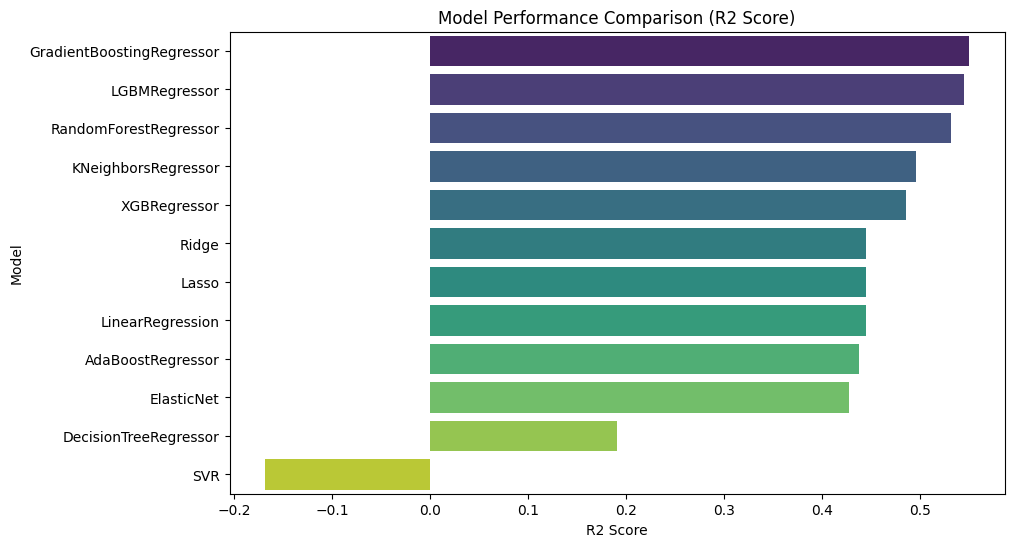

                        Model  R2 Score
0            LinearRegression     0.444
1                       Ridge     0.444
2                       Lasso     0.444
3                  ElasticNet     0.428
4       DecisionTreeRegressor     0.191
5       RandomForestRegressor     0.531
6   GradientBoostingRegressor     0.550
7           AdaBoostRegressor     0.438
8                         SVR    -0.169
9         KNeighborsRegressor     0.495
10               XGBRegressor     0.486
11              LGBMRegressor     0.545
RandomForestRegressor Best Params: {'max_depth': 10, 'n_estimators': 300}
RandomForestRegressor R2 Score: 0.6079228877460969
--------------------------------------------------
GradientBoostingRegressor Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
GradientBoostingRegressor R2 Score: 0.5941165128647501
--------------------------------------------------
AdaBoostRegressor Best Params: {'n_estimators': 50}
AdaBoostRegressor R2 Score: 0.4955834943216093


In [153]:
df,X,y, best_models = main()